In [90]:
import os 
import sys
import numpy as np
import requests
import json
from PIL import Image 
from io import BytesIO 
from functools import reduce
import cv2

In [102]:
def download(url, file_name):

    with open(file_name, 'wb') as handle:
        response = requests.get(url, stream=True)

        if not response.ok:
            print(response)

        for block in response.iter_content(1024):
            if not block:
                break
            handle.write(block)
    

def get_img_from_URL(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = np.array(img)[:,:,:-1]
    return img

def combine_objects(objects):
    imgs = [] 
    for obj in objects:
        img_url = obj["instanceURI"]
        img = get_img_from_URL(img_url)
        imgs.append(img)
    return reduce(lambda x, y: np.clip((x/1. + y/1.), 0, 255), imgs)

In [103]:
json_path = './dataset/Custom/export-2020-01-02T09_57_01.332Z.json'
mask_path = "./dataset/Custom/mask/"

In [104]:
with open(json_path, 'r') as f:
    labels = json.load(f)

In [107]:
for label in labels:
    if len(label["Label"]["objects"]) > 1:
        combined_img = combine_objects(label["Label"]["objects"])
        filename = os.path.join(mask_path, label["External ID"])
        cv2.imwrite(filename, combined_img)
    else: 
        img_url = label["Label"]["objects"][0]["instanceURI"]
        filename = os.path.join(mask_path, label["External ID"])
        download(img_url, filename)
        

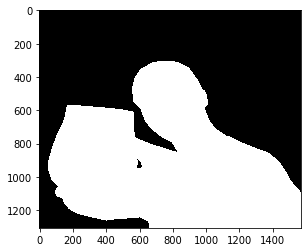

In [125]:
plt.imshow(cv2.imread("./dataset/Custom/mask/IMG_3562.jpg"))

### Custom data resizing logic

In [121]:
import cv2
import os

In [122]:
data_path = "../../AdditionalData/2차/"
target_path = "../../new_add/"
files = [os.path.join(data_path, f) for f in os.listdir(data_path) if 'JPG' in f] 

In [124]:
for f in files:
    img = cv2.imread(f, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (1570, 1570))
    
    cv2.imwrite(os.path.join(target_path, f.split("/")[-1]), img)
    